# Handwritten Number Recognition with TFLearn and MNIST

In this notebook, we'll be building a neural network that recognizes handwritten numbers 0-9. 

This kind of neural network is used in a variety of real-world applications including: recognizing phone numbers and sorting postal mail by address. To build the network, we'll be using the **MNIST** data set, which consists of images of handwritten numbers and their correct labels 0-9.

We'll be using [Keras](https://keras.io/), is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. We'll start off by importing all the modules we'll need, then load the data, and finally build the network.

In [1]:
# Import Numpy, keras and MNIST data
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


## Retrieving training and test data

The MNIST data set already contains both training and test data. There are 60,000 data points of training data, and 10,000 points of test data. If you do not have the data file locally at '~/.keras/datasets/' + path, it will be downloaded to this location.

Each MNIST data point has:
1. an image of a handwritten digit and 
2. a corresponding label (a number 0-9 that identifies the image)

We'll call the images, which will be the input to our neural network, **X** and their corresponding labels **y**.

We're going to want our labels as *one-hot vectors*, which are vectors of 0's and one 1. It's easiest to see this in a example. As a one-hot vector, the number 0 is represented as [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], and 4 is represented as [0, 0, 0, 0, 1, 0, 0, 0, 0, 0].

### Flattened data

For this example, we'll be using *flattened* data or a representation of MNIST images in one dimension rather than two. So, each handwritten number image, which is 28x28 pixels, will be represented as a one dimensional array of 784 pixel values. 

Flattening the data throws away information about the 2D structure of the image, but it simplifies our data so that all of the training data can be contained in one array whose shape is [60000, 784]; the first dimension is the number of training images and the second dimension is the number of pixels in each image. This is the kind of data that is easy to analyze using a simple neural network.

In [2]:
# Retrieve the training and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape: (60000, 28, 28)
X_test shape:  (10000, 28, 28)
y_train shape: (60000,)
y_test shape:  (10000,)


## Visualize the training data

Provided below is a function that will help you visualize the MNIST data. By passing in the index of a training example, the function `show_digit` will display that training image along with it's corresponding label in the title.

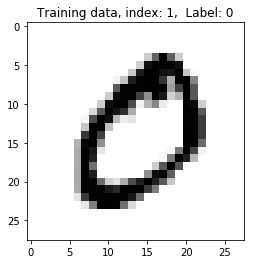

In [3]:
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

# Function for displaying a training image by it's index in the MNIST set
def display_digit(index):
    label = y_train[index].argmax(axis=0)
    image = X_train[index]
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
display_digit(1)

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)




Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
#One Hot encoding of labels.
from keras.utils.np_utils import to_categorical
print(y_train.shape)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)

(60000,)
(60000, 10)


## Building the network

For this example, you'll define:

1. The input layer, which tells the network the number of inputs it should expect for each piece of MNIST data. 
2. Hidden layers, which recognize patterns in data and connect the input to the output layer, and
3. The output layer, which defines how the network learns and outputs a label for a given image.

Let's start with the input layer; to define the input layer, you'll define the type of data that the network expects. For example,

```
net = tflearn.input_data([None, 100])
```

would create a network with 100 inputs. The number of inputs to your network needs to match the size of your data. For this example, we're using 784 element long vectors to encode our input data, so we need **784 input units**.


### Adding layers

To add new hidden layers, you use 

```
net = tflearn.fully_connected(net, n_units, activation='ReLU')
```

This adds a fully connected layer where every unit (or node) in the previous layer is connected to every unit in this layer. The first argument `net` is the network you created in the `tflearn.input_data` call, it designates the input to the hidden layer. You can set the number of units in the layer with `n_units`, and set the activation function with the `activation` keyword. You can keep adding layers to your network by repeated calling `tflearn.fully_connected(net, n_units)`. 

Then, to set how you train the network, use:

```
net = tflearn.regression(net, optimizer='sgd', learning_rate=0.1, loss='categorical_crossentropy')
```

Again, this is passing in the network you've been building. The keywords: 

* `optimizer` sets the training method, here stochastic gradient descent
* `learning_rate` is the learning rate
* `loss` determines how the network error is calculated. In this example, with categorical cross-entropy.

Finally, you put all this together to create the model with `tflearn.DNN(net)`.

In [6]:
# Define the neural network
def build_model():
    model = Sequential()
    model.add(Dense(512, input_shape=(784,)))
    model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
    model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.
    return model

In [7]:
# Build the model
model = build_model()

In [8]:
model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

## Training the network

Now that we've constructed the network, saved as the variable `model`, we can fit it to the data. Here we use the `model.fit` method. You pass in the training features `trainX` and the training targets `trainY`. Below I set `validation_set=0.1` which reserves 10% of the data set as the validation set. You can also set the batch size and number of epochs with the `batch_size` and `n_epoch` keywords, respectively.

Too few epochs don't effectively train your network, and too many take a long time to execute. Choose wisely!

In [9]:
# Training
model.fit(X_train, y_train, batch_size=128, nb_epoch=4, verbose=1,validation_data=(X_test, y_test))

/Users/i863181/anaconda/envs/aind-dog/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 6s - loss: 0.2462 - acc: 0.9236 - val_loss: 0.1078 - val_acc: 0.9669

## Testing
After you're satisified with the training output and accuracy, you can then run the network on the **test data set** to measure it's performance! Remember, only do this after you've done the training and are satisfied with the results.

A good result will be **higher than 95% accuracy**. Some simple models have been known to get up to 99.7% accuracy!

In [13]:
# Compare the labels that our model predicts with the actual labels

score = model.evaluate(X_test, y_test, batch_size=32, verbose=1,sample_weight=None)
# Print out the result
print('Test score:', score[0])
print('Test accuracy:', score[1])


 9856/10000 [============================>.] - ETA: 0sTest score: 0.0755988115298
Test accuracy: 0.9799
